## Основни примери с Pandas

Този ноутбук ще ви преведе през някои много основни концепции на Pandas. Ще започнем с импортиране на типични библиотеки за анализ на данни:


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Серия

Серията е като списък или едномерен масив, но с индекс. Всички операции са подравнени спрямо индекса.


In [37]:
a = pd.Series(range(1,10))
b = pd.Series(["I","like","to","use","Python","and","Pandas","very","much"],index=range(0,9))
print(a,b)

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
dtype: int64 0         I
1      like
2        to
3       use
4    Python
5       and
6    Pandas
7      very
8      much
dtype: object


Едно от честите приложения на сериите е **времевите серии**. При времевите серии индексът има специална структура - обикновено това е диапазон от дати или времеви отметки. Можем да създадем такъв индекс с `pd.date_range`.

Да предположим, че имаме серия, която показва количеството продукти, купувани всеки ден, и знаем, че всяка неделя също трябва да вземем един артикул за себе си. Ето как можем да моделираме това, използвайки серии:


Length of index is 366


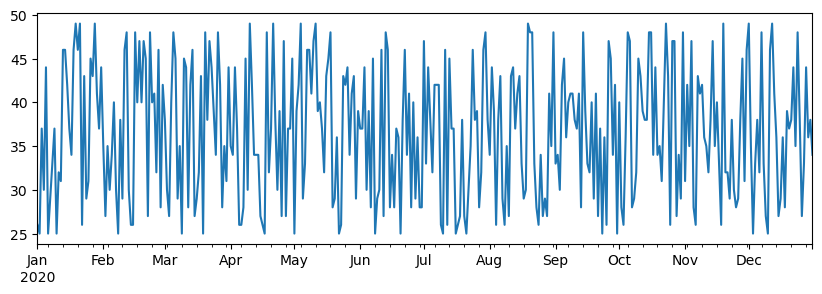

In [38]:
start_date = "Jan 1, 2020"
end_date = "Dec 31, 2020"
idx = pd.date_range(start_date,end_date)
print(f"Length of index is {len(idx)}")
items_sold = pd.Series(np.random.randint(25,50,size=len(idx)),index=idx)
items_sold.plot(figsize=(10,3))
plt.show()

In [39]:
additional_items = pd.Series(10,index=pd.date_range(start_date,end_date,freq="W"))
print(f"Additional items (10 item each week):\n{additional_items}")
total_items = items_sold+additional_items
print(f"Total items (sum of two series):\n{total_items}")

Additional items (10 item each week):
2020-01-05    10
2020-01-12    10
2020-01-19    10
2020-01-26    10
2020-02-02    10
2020-02-09    10
2020-02-16    10
2020-02-23    10
2020-03-01    10
2020-03-08    10
2020-03-15    10
2020-03-22    10
2020-03-29    10
2020-04-05    10
2020-04-12    10
2020-04-19    10
2020-04-26    10
2020-05-03    10
2020-05-10    10
2020-05-17    10
2020-05-24    10
2020-05-31    10
2020-06-07    10
2020-06-14    10
2020-06-21    10
2020-06-28    10
2020-07-05    10
2020-07-12    10
2020-07-19    10
2020-07-26    10
2020-08-02    10
2020-08-09    10
2020-08-16    10
2020-08-23    10
2020-08-30    10
2020-09-06    10
2020-09-13    10
2020-09-20    10
2020-09-27    10
2020-10-04    10
2020-10-11    10
2020-10-18    10
2020-10-25    10
2020-11-01    10
2020-11-08    10
2020-11-15    10
2020-11-22    10
2020-11-29    10
2020-12-06    10
2020-12-13    10
2020-12-20    10
2020-12-27    10
Freq: W-SUN, dtype: int64
Total items (sum of two series):
2020-01-01     NaN


Както виждате, имаме проблеми тук, защото в седмичната серия дните, които не са споменати, се считат за липсващи (`NaN`), а добавянето на `NaN` към число ни дава `NaN`. За да получим правилен резултат, трябва да зададем `fill_value`, когато добавяме серии:


2020-01-01    26.0
2020-01-02    25.0
2020-01-03    37.0
2020-01-04    30.0
2020-01-05    54.0
              ... 
2020-12-27    43.0
2020-12-28    44.0
2020-12-29    36.0
2020-12-30    38.0
2020-12-31    34.0
Length: 366, dtype: float64


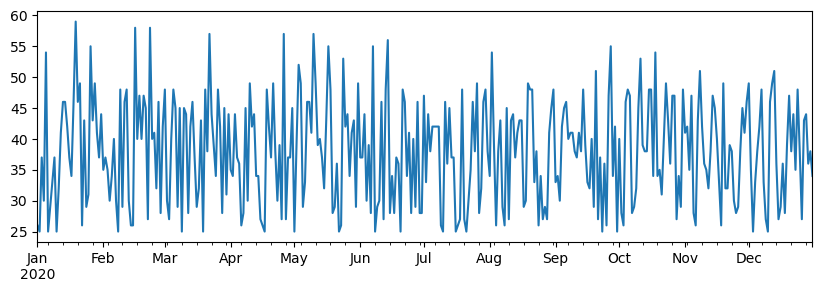

In [40]:
total_items = items_sold.add(additional_items,fill_value=0)
print(total_items)
total_items.plot(figsize=(10,3))
plt.show()

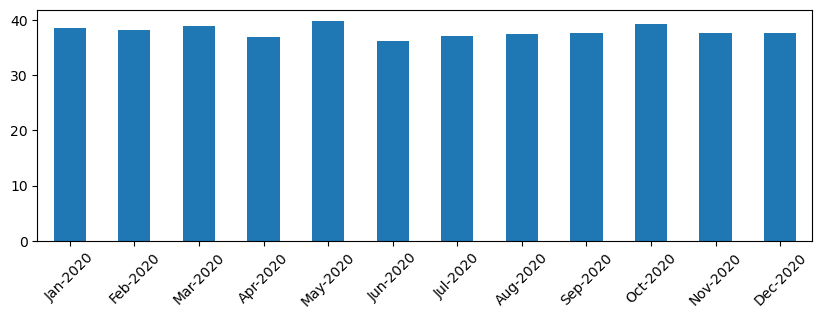

In [41]:
monthly = total_items.resample("1M").mean()
ax = monthly.plot(kind='bar',figsize=(10,3))
ax.set_xticklabels([x.strftime("%b-%Y") for x in monthly.index], rotation=45)
plt.show()

## DataFrame

DataFrame е по същество колекция от серии със същия индекс. Можем да комбинираме няколко серии заедно в DataFrame. Като се вземат предвид сериите `a` и `b`, дефинирани по-горе:


In [42]:
df = pd.DataFrame([a,b])
df

0     1   2    3       4    5       6     7     8
0  1     2   3    4       5    6       7     8     9
1  I  like  to  use  Python  and  Pandas  very  much

Можем също да използваме Series като колони и да задаваме имена на колони, използвайки речник:


In [43]:
df = pd.DataFrame({ 'A' : a, 'B' : b })
df

A       B
0  1       I
1  2    like
2  3      to
3  4     use
4  5  Python
5  6     and
6  7  Pandas
7  8    very
8  9    much

Същият резултат може да бъде постигнат чрез транспониране (и след това преименуване на колоните, за да съответстват на предишния пример):


In [44]:
pd.DataFrame([a,b]).T.rename(columns={ 0 : 'A', 1 : 'B' })

A       B
0  1       I
1  2    like
2  3      to
3  4     use
4  5  Python
5  6     and
6  7  Pandas
7  8    very
8  9    much

**Избор на колони** от DataFrame може да се направи така:


In [45]:
print(f"Column A (series):\n{df['A']}")
print(f"Columns B and A (DataFrame):\n{df[['B','A']]}")

Column A (series):
0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
Name: A, dtype: int64
Columns B and A (DataFrame):
        B  A
0       I  1
1    like  2
2      to  3
3     use  4
4  Python  5
5     and  6
6  Pandas  7
7    very  8
8    much  9


**Избор на редове** въз основа на израз за филтър:


In [46]:
df[df['A']<5]

A     B
0  1     I
1  2  like
2  3    to
3  4   use

Начинът, по който работи, е, че изразът `df['A']<5` връща булева серия, която показва дали изразът е `True` или `False` за всеки елемент от серията. Когато серията се използва като индекс, тя връща подмножество от редове в DataFrame. Следователно, не е възможно да се използва произволен булев израз на Python, например, записването на `df[df['A']>5 and df['A']<7]` би било грешно. Вместо това, трябва да използвате специалната операция `&` върху булеви серии:


In [47]:
df[(df['A']>5) & (df['A']<7)]

A    B
5  6  and

**Създаване на нови изчислими колони**. Можем лесно да създадем нови изчислими колони за нашия DataFrame, като използваме интуитивни изрази. Кодът по-долу изчислява отклонението на A от неговата средна стойност.


In [48]:
df['DivA'] = df['A']-df['A'].mean()
df

A       B  DivA
0  1       I  -4.0
1  2    like  -3.0
2  3      to  -2.0
3  4     use  -1.0
4  5  Python   0.0
5  6     and   1.0
6  7  Pandas   2.0
7  8    very   3.0
8  9    much   4.0

Това, което всъщност се случва, е, че изчисляваме серия и след това присвояваме тази серия на лявата страна, създавайки друга колона.


In [49]:
# WRONG: df['ADescr'] = "Low" if df['A'] < 5 else "Hi"
df['LenB'] = len(df['B']) # Wrong result

In [50]:
df['LenB'] = df['B'].apply(lambda x: len(x))
# or
df['LenB'] = df['B'].apply(len)
df

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6
5  6     and   1.0     3
6  7  Pandas   2.0     6
7  8    very   3.0     4
8  9    much   4.0     4

**Избор на редове въз основа на числа** може да се направи с помощта на конструкцията `iloc`. Например, за да изберете първите 5 реда от DataFrame:


In [52]:
df.iloc[:5]

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6

**Групирането** често се използва за получаване на резултат, подобен на *сводни таблици* в Excel. Да предположим, че искаме да изчислим средната стойност на колоната `A` за всяка дадена стойност на `LenB`. Тогава можем да групираме нашия DataFrame по `LenB` и да извикаме `mean`:


In [53]:
df.groupby(by='LenB').mean()

A      DivA
LenB                    
1     1.000000 -4.000000
2     3.000000 -2.000000
3     5.000000  0.000000
4     6.333333  1.333333
6     6.000000  1.000000

Ако трябва да изчислим средната стойност и броя на елементите в групата, тогава можем да използваме по-сложната функция `aggregate`:


In [58]:
df.groupby(by='LenB') \
 .aggregate({ 'DivA' : len, 'A' : lambda x: x.mean() }) \
 .rename(columns={ 'DivA' : 'Count', 'A' : 'Mean'})

Count      Mean
LenB                 
1         1  1.000000
2         1  3.000000
3         2  5.000000
4         3  6.333333
6         2  6.000000

## Печатане и визуализация

Често се налага на специалистите по данни да изследват данните, затова е важно да могат да ги визуализират. Когато DataFrame е голям, често искаме просто да се уверим, че всичко върви правилно, като отпечатаме първите няколко реда. Това може да се направи чрез извикване на `df.head()`. Ако го изпълнявате от Jupyter Notebook, ще отпечата DataFrame в удобна таблична форма.


In [59]:
df.head()

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6

Вече разгледахме използването на функцията `plot` за визуализиране на някои колони. Макар че `plot` е много полезна за множество задачи и поддържа различни типове графики чрез параметъра `kind=`, винаги можете да използвате библиотеката `matplotlib`, за да създадете нещо по-сложно. Ще разгледаме визуализацията на данни подробно в отделни уроци от курса.


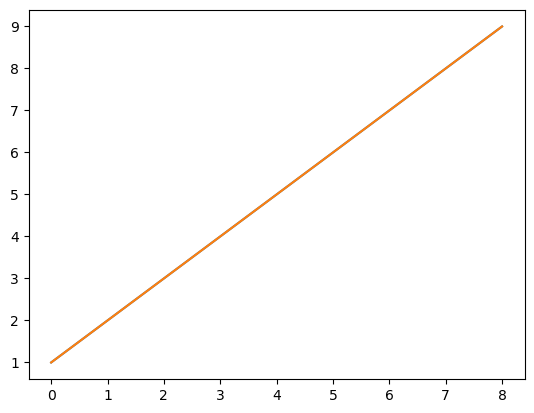

In [61]:
df['A'].plot()
plt.show()

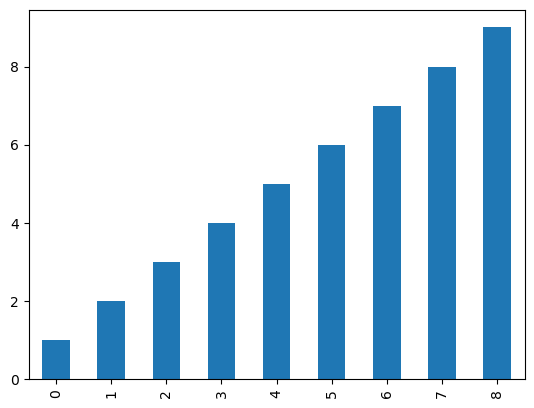

In [63]:
df['A'].plot(kind='bar')
plt.show()

Този преглед обхваща най-важните концепции на Pandas, но библиотеката е изключително богата и няма ограничения за това, което можете да постигнете с нея! Нека сега приложим тези знания за решаване на конкретен проблем.



---

**Отказ от отговорност**:  
Този документ е преведен с помощта на AI услуга за превод [Co-op Translator](https://github.com/Azure/co-op-translator). Въпреки че се стремим към точност, моля, имайте предвид, че автоматизираните преводи може да съдържат грешки или неточности. Оригиналният документ на неговия изходен език трябва да се счита за авторитетен източник. За критична информация се препоръчва професионален превод от човек. Ние не носим отговорност за каквито и да е недоразумения или погрешни интерпретации, произтичащи от използването на този превод.
